In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Country code data
country_code = pd.read_csv('~/Desktop/2-硕士/MY498/Data/country_code.csv')[['alpha3', 'name']]
country_code['alpha3'] = country_code['alpha3'].str.upper()
country_code.columns = ['ISO code', 'Country']
country_code.sort_values(by='ISO code', inplace=True)

## Labour Productivity

Labour productivity is defined as real gross domestic product (GDP) per hour worked. This captures the use of labour inputs better than just output per employee, with labour input defined as total hours worked by all persons involved (OECD).

In [49]:
# Real GDP at constant 2017 national prices (in mil. 2017US$)
# real_gdp = pd.read_csv('~/Desktop/2-硕士/MY498/Data/6-Real GDP at constant 2017 national prices (in mil. 2017US$)——2000-2019.csv')
real_gdp = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Real GDP at constant 2017 national prices (in mil. 2017US$)—1999-2019.csv')
real_gdp.drop(labels=['Variable code', 'Variable name'], axis=1, inplace=True)
real_gdp = real_gdp.melt(id_vars=['ISO code', 'Country'], var_name='Year', value_name='Real GDP')
real_gdp = real_gdp.sort_values(by=['ISO code', 'Year']).reset_index(drop=True)
real_gdp['RGDP added value'] = real_gdp.groupby('ISO code').apply(lambda x: x['Real GDP'].diff()).reset_index(drop=True)
real_gdp.dropna(inplace=True)
real_gdp

,ISO code,Country,Year,Real GDP,RGDP added value
1,ABW,Aruba,2000,2836.911865,122.529053
2,ABW,Aruba,2001,2826.565674,-10.346191
3,ABW,Aruba,2002,2765.385742,-61.179932
4,ABW,Aruba,2003,2778.252686,12.866943
5,ABW,Aruba,2004,2987.162842,208.910156
...,...,...,...,...,...
3838,ZWE,Zimbabwe,2015,42008.199219,734.617188
3839,ZWE,Zimbabwe,2016,42325.726562,317.527344
3840,ZWE,Zimbabwe,2017,44316.742188,1991.015625
3841,ZWE,Zimbabwe,2018,46457.097656,2140.355469


In [50]:
real_gdp[real_gdp['ISO code'] == 'USA']

,ISO code,Country,Year,Real GDP,RGDP added value
3634,USA,United States,2000,14143361.0,560625.0
3635,USA,United States,2001,14284560.0,141199.0
3636,USA,United States,2002,14533353.0,248793.0
3637,USA,United States,2003,14949183.0,415830.0
3638,USA,United States,2004,15517086.0,567903.0
3639,USA,United States,2005,16062235.0,545149.0
3640,USA,United States,2006,16520807.0,458572.0
3641,USA,United States,2007,16830766.0,309959.0
3642,USA,United States,2008,16807780.0,-22986.0
3643,USA,United States,2009,16381405.0,-426375.0


In [5]:
# Employment
employment = pd.read_csv('~/Desktop/2-硕士/MY498/Data/7-Number of persons engaged (in millions)_2000-2019.csv')
employment.drop(labels=['Variable code', 'Variable name'], axis=1, inplace=True)
employment = employment.melt(id_vars=['ISO code', 'Country'], var_name='Year', value_name='Employment')

print(employment.isnull().sum())
employment

ISO code       0
Country        0
Year           0
Employment    86
dtype: int64


,ISO code,Country,Year,Employment
0,ABW,Aruba,2000,0.041900
1,AGO,Angola,2000,9.063555
2,AIA,Anguilla,2000,0.005413
3,ALB,Albania,2000,0.962967
4,ARE,United Arab Emirates,2000,1.779000
...,...,...,...,...
3635,VNM,Viet Nam,2019,50.399563
3636,YEM,Yemen,2019,5.531877
3637,ZAF,South Africa,2019,18.642710
3638,ZMB,Zambia,2019,5.225448


In [6]:
# Average annual hours worked by persons engaged - PWT 10.01
average_annual_hours_pwt = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Average annual hours worked by persons engaged_PWT 10.01_2000-2019.csv')
average_annual_hours_pwt.drop(labels=['Variable code', 'Variable name'], axis=1, inplace=True)
average_annual_hours_pwt = average_annual_hours_pwt.melt(id_vars=['ISO code', 'Country'], var_name='Year', value_name='Average annual hours per person engaged')
average_annual_hours_pwt['Year'] = average_annual_hours_pwt['Year'].astype(int)
average_annual_hours_pwt

,ISO code,Country,Year,Average annual hours per person engaged
0,ARG,Argentina,2000,1862.136267
1,AUS,Australia,2000,1847.480068
2,AUT,Austria,2000,1798.432211
3,BEL,Belgium,2000,1589.102611
4,BGD,Bangladesh,2000,2560.827163
...,...,...,...,...
1375,URY,Uruguay,2019,1532.513740
1376,USA,United States,2019,1765.346390
1377,VEN,Venezuela (Bolivarian Republic of),2019,NaN
1378,VNM,Viet Nam,2019,2131.968232


In [7]:
average_annual_hours_pwt[average_annual_hours_pwt['ISO code']=='CAN']

,ISO code,Country,Year,Average annual hours per person engaged
7,CAN,Canada,2000,1786.186367
76,CAN,Canada,2001,1773.040815
145,CAN,Canada,2002,1754.363462
214,CAN,Canada,2003,1743.803145
283,CAN,Canada,2004,1753.799959
352,CAN,Canada,2005,1744.018222
421,CAN,Canada,2006,1743.540750
490,CAN,Canada,2007,1742.925627
559,CAN,Canada,2008,1740.305980
628,CAN,Canada,2009,1710.836026


In [8]:
# Average annual hours worked by persons engaged - ILO
# Mean weekly hours actually worked per employed person - ILO
mean_weekly_hours = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Mean weekly hours actually worked per employed person_2000-2019.csv')[['ref_area.label', 'time', 'obs_value']]
mean_weekly_hours.columns = ['Country', 'Year', 'Mean weekly hours per employed person']
mean_weekly_hours = mean_weekly_hours.merge(country_code, on='Country', how='left')[['ISO code', 'Country', 'Year', 'Mean weekly hours per employed person']]
mean_weekly_hours['Mean weekly hours per employed person'] = mean_weekly_hours['Mean weekly hours per employed person'] * 52
mean_weekly_hours.rename(columns={'Mean weekly hours per employed person':'Average annual hours per person engaged'}, inplace=True)
print(mean_weekly_hours.shape)
print(f"\nThe missing values in ILO working hours data:\n{mean_weekly_hours.isnull().sum()}\n")

# Add country code for unmatch country name
unmatch_country_names = mean_weekly_hours.loc[mean_weekly_hours['ISO code'].isnull(), 'Country'].unique()
print(f"Unmatched country names:\n{unmatch_country_names}\n")
iso_code_for_mismatch_country_name = ['BOL', 'FLK', 'FSM', 'HKG', 'IRN', 'KOR', None,
                                      'MAC', 'MDA', None, 'VEN']

for iso_code, country in zip(iso_code_for_mismatch_country_name, unmatch_country_names):
    mean_weekly_hours.loc[mean_weekly_hours['Country']==country, 'ISO code'] = iso_code

mean_weekly_hours.dropna(subset=['ISO code'], inplace=True)
print(mean_weekly_hours.isnull().sum())
mean_weekly_hours

(1613, 4)

The missing values in ILO working hours data:
ISO code                                   122
Country                                      0
Year                                         0
Average annual hours per person engaged      0
dtype: int64

Unmatched country names:
['Bolivia (Plurinational State of)' 'Falkland Islands, Malvinas'
 'Micronesia (Federated States of)' 'Hong Kong, China'
 'Iran (Islamic Republic of)' 'Republic of Korea' 'Kosovo' 'Macao, China'
 'Republic of Moldova' 'Occupied Palestinian Territory'
 'Venezuela (Bolivarian Republic of)']

ISO code                                   0
Country                                    0
Year                                       0
Average annual hours per person engaged    0
dtype: int64


,ISO code,Country,Year,Average annual hours per person engaged
0,ABW,Aruba,2010,2050.36
1,AFG,Afghanistan,2017,1973.92
2,AFG,Afghanistan,2014,1926.60
3,AGO,Angola,2019,2161.12
4,ALB,Albania,2019,2168.92
...,...,...,...,...
1608,ZMB,Zambia,2018,2051.40
1609,ZMB,Zambia,2017,2078.96
1610,ZWE,Zimbabwe,2019,2030.60
1611,ZWE,Zimbabwe,2014,1548.56


In [9]:
# Find the rows in PWT data that are not in the mean_weekly_hours
hour_obs_unique = average_annual_hours_pwt.merge(mean_weekly_hours, on=['ISO code', 'Year'], how = 'left', indicator=True)
hour_obs_unique = hour_obs_unique[hour_obs_unique['_merge'] == 'left_only'].drop(columns=['Country_y', 'Average annual hours per person engaged_y', '_merge'])
hour_obs_unique.rename(columns={'Country_x':'Country', 'Average annual hours per person engaged_x': 'Average annual hours per person engaged'}, inplace=True)
hour_obs_unique.loc[hour_obs_unique['Country']=='China', 'Average annual hours per person engaged'] += 250
hour_obs_unique

,ISO code,Country,Year,Average annual hours per person engaged
4,BGD,Bangladesh,2000,2560.827163
6,BRA,Brazil,2000,1837.927050
10,CHN,China,2000,2340.475311
17,DOM,Dominican Republic,2000,2206.566895
18,ECU,Ecuador,2000,1800.226342
...,...,...,...,...
1336,HKG,"China, Hong Kong SAR",2019,2147.574362
1372,TTO,Trinidad and Tobago,2019,NaN
1374,TWN,Taiwan,2019,2085.135333
1375,URY,Uruguay,2019,1532.513740


In [10]:
# Merge the two datasets
average_annual_hours = pd.concat([mean_weekly_hours, hour_obs_unique], axis=0)
average_annual_hours.sort_values(by=['ISO code', 'Year'], inplace=True, ignore_index=True)
average_annual_hours.rename(columns={'Average annual hours per person engaged':'Average annual hours'}, inplace=True)
average_annual_hours

,ISO code,Country,Year,Average annual hours
0,ABW,Aruba,2010,2050.36
1,AFG,Afghanistan,2014,1926.60
2,AFG,Afghanistan,2017,1973.92
3,AGO,Angola,2019,2161.12
4,ALB,Albania,2007,2335.32
...,...,...,...,...
1865,ZMB,Zambia,2018,2051.40
1866,ZMB,Zambia,2019,2186.08
1867,ZWE,Zimbabwe,2004,2505.88
1868,ZWE,Zimbabwe,2014,1548.56


In [11]:
print(average_annual_hours.isnull().sum())
average_annual_hours[average_annual_hours['ISO code']=='DEU']

ISO code                 0
Country                  0
Year                     0
Average annual hours    29
dtype: int64


,ISO code,Country,Year,Average annual hours
417,DEU,Germany,2000,1972.88
418,DEU,Germany,2001,1958.84
419,DEU,Germany,2002,1941.16
420,DEU,Germany,2003,1917.76
421,DEU,Germany,2004,1917.76
422,DEU,Germany,2005,1914.64
423,DEU,Germany,2006,1873.04
424,DEU,Germany,2007,1889.16
425,DEU,Germany,2008,1864.20
426,DEU,Germany,2009,1832.48


## Covariates

* Patent stock
* Capital stock
* Private credit by deposit money banks to GDP (%)
* Gross value added in agriculture as a ratio of total GDP
* Inflation
* General government final consumption expenditure (% of GDP)
* Openness

### Patent stock

$K_t = (1 -\delta)\times K_{t-1} + I_t$

where for a given country $K_t$ is the patent stock at year $t$, $I_t$ is the patent applications at year $t$, and $\delta$ is the depreciation rate.

The initial year $K_0$ is calculated separately using $K_0 = \frac{I_0}{g + \delta}$, where $g$ is the average growth rate of patent applications over the entire period for which the data was available.

In [12]:
## Helper function to calculate patent stock
def calculate_patent_stock(df, depreciation_rate=0.15):
    # Sort the data by country and year
    df = df.sort_values(by=['ISO code', 'Year'])

    # Calculate the average growth rate (g) for each country
    df['Growth_Rate'] = df.groupby('Country')['Patent_Applications'].pct_change()
    average_growth_rate = df.groupby('Country')['Growth_Rate'].mean().fillna(0)

    # Initialize the patent stock (K_0) for the first year for each country
    df['Patent_Stock'] = 0.0
    
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        g = average_growth_rate[country]
        I0 = country_data.iloc[0]['Patent_Applications']
        K0 = I0 / (g + depreciation_rate)
        
        df.loc[country_data.index[0], 'Patent_Stock'] = K0
        
        # Calculate patent stock for subsequent years using K_{t} = (1 - δ) * K_{t-1} + I_{t}
        for i in range(1, len(country_data)):
            prev_index = country_data.index[i-1]
            curr_index = country_data.index[i]
            It = country_data.loc[curr_index, 'Patent_Applications']
            df.loc[curr_index, 'Patent_Stock'] = (1 - depreciation_rate) * df.loc[prev_index, 'Patent_Stock'] + It

    return df


In [13]:
# Patent stock
patent_stock = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/2-Patent applications (residents)_2000-2019.csv')
patent_stock.drop(labels=['Series Name', 'Series Code'], axis=1, inplace=True)
patent_stock = patent_stock.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='Patent_Applications')
patent_stock = patent_stock.drop(index=patent_stock[patent_stock['Patent_Applications']=='..'].index).reset_index()
patent_stock['Patent_Applications'] = patent_stock['Patent_Applications'].astype(int)
patent_stock['Year'] = patent_stock['Year'].str.extract('(\d+)').astype(int)
patent_stock.rename(columns={'Country Code':'ISO code', 'Country Name':'Country'}, inplace=True)
patent_stock = calculate_patent_stock(patent_stock)[['ISO code', 'Country', 'Year', 'Patent_Stock']]
patent_stock.sort_values(by=['ISO code', 'Year'], inplace=True, ignore_index=True)
patent_stock

,ISO code,Country,Year,Patent_Stock
0,ABW,Aruba,2002,6.666667
1,AGO,Angola,2018,-11.612903
2,AGO,Angola,2019,-7.870968
3,ALB,Albania,2011,5.870705
4,ALB,Albania,2014,14.990099
...,...,...,...,...
2080,ZMB,Zambia,2017,75.573494
2081,ZMB,Zambia,2018,75.237470
2082,ZMB,Zambia,2019,65.951849
2083,ZWE,Zimbabwe,2015,231.428571


In [14]:
print(patent_stock.info())
patent_stock[patent_stock['ISO code']=='CAN']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ISO code      2085 non-null   object 
 1   Country       2085 non-null   object 
 2   Year          2085 non-null   int64  
 3   Patent_Stock  2085 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.3+ KB
None


,ISO code,Country,Year,Patent_Stock
289,CAN,Canada,2000,27146.770080
290,CAN,Canada,2001,27037.754568
291,CAN,Canada,2002,26941.091383
292,CAN,Canada,2003,26828.927675
293,CAN,Canada,2004,28035.588524
294,CAN,Canada,2005,29013.250246
295,CAN,Canada,2006,30183.262709
296,CAN,Canada,2007,30653.773302
297,CAN,Canada,2008,31116.707307
298,CAN,Canada,2009,31516.201211


### GERD as a percentage of GDP (not used)

In [ ]:
# gerd = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/3-GERD as a percentage of GDP_2000-2019.csv')
# gerd = gerd[['LOCATION', 'Country', 'TIME', 'Value']]
# gerd.columns = ['ISO code', 'Country', 'Year', 'GERD as a percentage of GDP']
# gerd

In [ ]:
# print(gerd.info())
# gerd[gerd['ISO code']=='CAN']

### Capital stock

In [15]:
capital_stock = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/4-Capital stock at constant 2017 national prices (in mil. 2017US$)_2000-2019.csv')
capital_stock.drop(labels=['Variable code', 'Variable name'], axis=1, inplace=True)
capital_stock = capital_stock.melt(id_vars=['ISO code', 'Country'], var_name='Year', value_name='Capital stock')
capital_stock['Year'] = capital_stock['Year'].astype(int)
capital_stock

,ISO code,Country,Year,Capital stock
0,ABW,Aruba,2000,9.078892e+03
1,AGO,Angola,2000,7.799719e+05
2,AIA,Anguilla,2000,1.102526e+03
3,ALB,Albania,2000,1.103874e+05
4,ARE,United Arab Emirates,2000,2.110630e+06
...,...,...,...,...
3595,VNM,Viet Nam,2019,1.964750e+06
3596,YEM,Yemen,2019,5.404372e+05
3597,ZAF,South Africa,2019,2.811258e+06
3598,ZMB,Zambia,2019,2.851388e+05


In [16]:
print(capital_stock.isnull().sum())
capital_stock[capital_stock['ISO code']=='POL']

ISO code         0
Country          0
Year             0
Capital stock    0
dtype: int64


,ISO code,Country,Year,Capital stock
133,POL,Poland,2000,1315058.500
313,POL,Poland,2001,1369213.250
493,POL,Poland,2002,1413047.500
673,POL,Poland,2003,1456580.000
853,POL,Poland,2004,1505844.125
1033,POL,Poland,2005,1562725.375
1213,POL,Poland,2006,1636082.125
1393,POL,Poland,2007,1731905.125
1573,POL,Poland,2008,1835121.250
1753,POL,Poland,2009,1927508.250


### Private credit by deposit money banks to GDP (%)

In [17]:
private_credit = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/5-Private credit by deposit money banks to GDP (%)_2000-2019.csv', encoding='ISO-8859-1')
private_credit.drop(labels=['Series Name', 'Series Code'], axis=1, inplace=True)
private_credit = private_credit.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='Private credit to GDP')
private_credit['Year'] = private_credit['Year'].str.extract('(\d+)').astype(int)
private_credit.rename(columns={'Country Code':'ISO code', 'Country Name':'Country'}, inplace=True)
private_credit.drop(index=private_credit[private_credit['Private credit to GDP']=='..'].index, inplace=True)
private_credit['Private credit to GDP'] = private_credit['Private credit to GDP'].astype(float)
private_credit.rename(columns={'Private credit to GDP':'FinDev'}, inplace=True)
private_credit

,ISO code,Country,Year,FinDev
1,ALB,Albania,2000,4.870879
2,DZA,Algeria,2000,5.949072
4,AGO,Angola,2000,1.966540
5,ATG,Antigua and Barbuda,2000,58.627690
6,ARG,Argentina,2000,23.167420
...,...,...,...,...
4292,VUT,Vanuatu,2019,57.717490
4294,VNM,Vietnam,2019,137.913900
4296,PSE,West Bank and Gaza,2019,44.828400
4298,ZMB,Zambia,2019,12.496670


In [18]:
print(private_credit.info())
private_credit[private_credit['ISO code']=='CAN']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3527 entries, 1 to 4299
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ISO code  3527 non-null   object 
 1   Country   3527 non-null   object 
 2   Year      3527 non-null   int64  
 3   FinDev    3527 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 137.8+ KB
None


,ISO code,Country,Year,FinDev
34,CAN,Canada,2000,73.98727
249,CAN,Canada,2001,121.35270
464,CAN,Canada,2002,117.83880
679,CAN,Canada,2003,113.24010
894,CAN,Canada,2004,115.44250
1109,CAN,Canada,2005,121.65960
1324,CAN,Canada,2006,134.11870
1539,CAN,Canada,2007,123.53360
1754,CAN,Canada,2008,124.09780


### Gross value added in agriculture as a ratio of total GDP

In [19]:
agri_share = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/8-Share of agriculture_2000-2019.csv')
agri_share.drop(labels=['Series Name', 'Series Code'], axis=1, inplace=True)
agri_share = agri_share.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='Share of agriculture')
agri_share['Year'] = agri_share['Year'].str.extract('(\d+)').astype(int)
agri_share.rename(columns={'Country Code':'ISO code', 'Country Name':'Country'}, inplace=True)
agri_share.drop(index=agri_share[agri_share['Share of agriculture']=='..'].index, inplace=True)
agri_share['Share of agriculture'] = agri_share['Share of agriculture'].astype(float)
agri_share

,ISO code,Country,Year,Share of agriculture
1,ALB,Albania,2000,24.515412
2,DZA,Algeria,2000,8.395048
4,AND,Andorra,2000,0.517056
5,AGO,Angola,2000,5.664690
6,ATG,Antigua and Barbuda,2000,1.289744
...,...,...,...,...
4331,UZB,Uzbekistan,2019,24.381823
4334,VNM,Viet Nam,2019,11.784529
4336,PSE,West Bank and Gaza,2019,7.054017
4338,ZMB,Zambia,2019,2.860775


In [20]:
print(agri_share.isnull().sum())
agri_share[agri_share['Country']=='China']

ISO code                0
Country                 0
Year                    0
Share of agriculture    0
dtype: int64


,ISO code,Country,Year,Share of agriculture
41,CHN,China,2000,14.676242
258,CHN,China,2001,13.983461
475,CHN,China,2002,13.301488
692,CHN,China,2003,12.348999
909,CHN,China,2004,12.916648
1126,CHN,China,2005,11.641496
1343,CHN,China,2006,10.625761
1560,CHN,China,2007,10.246166
1777,CHN,China,2008,10.169048
1994,CHN,China,2009,9.636186


### Inflation

GDP deflator (annual %) 

  Inflation as measured by the annual growth rate of the GDP implicit deflator shows the rate of price change in the economy as a whole. The GDP implicit deflator is the ratio of GDP in current local currency to GDP in constant local currency.

In [21]:
inflation = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/9-Inflation, GDP deflator (annual %)_2000-2019.csv')
inflation.drop(labels=['Series Name', 'Series Code'], axis=1, inplace=True)
inflation = inflation.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='Inflation')
inflation['Year'] = inflation['Year'].str.extract('(\d+)').astype(int)
inflation.rename(columns={'Country Code':'ISO code', 'Country Name':'Country'}, inplace=True)
inflation.drop(index=inflation[inflation['Inflation']=='..'].index, inplace=True)
inflation['Inflation'] = inflation['Inflation'].astype(float)
inflation

,ISO code,Country,Year,Inflation
1,ALB,Albania,2000,5.647471
2,DZA,Algeria,2000,22.678009
4,AND,Andorra,2000,28.741553
5,AGO,Angola,2000,418.018992
6,ATG,Antigua and Barbuda,2000,1.488252
...,...,...,...,...
4334,VNM,Viet Nam,2019,2.423227
4335,VIR,Virgin Islands (U.S.),2019,2.053380
4336,PSE,West Bank and Gaza,2019,3.849469
4338,ZMB,Zambia,2019,7.633470


In [22]:
print(inflation.isnull().sum())
inflation[inflation['Country']=='China']

ISO code     0
Country      0
Year         0
Inflation    0
dtype: int64


,ISO code,Country,Year,Inflation
41,CHN,China,2000,2.062793
258,CHN,China,2001,2.047049
475,CHN,China,2002,0.602099
692,CHN,China,2003,2.603178
909,CHN,China,2004,6.951993
1126,CHN,China,2005,3.903744
1343,CHN,China,2006,3.926549
1560,CHN,China,2007,7.749686
1777,CHN,China,2008,7.795346
1994,CHN,China,2009,-0.209533


### General government final consumption expenditure (% of GDP)

In [23]:
govern_size = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/10-General government final consumption expenditure (% of GDP)_2000-2019.csv')
govern_size.drop(labels=['Series Name', 'Series Code'], axis=1, inplace=True)
govern_size = govern_size.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='Government size')
govern_size['Year'] = govern_size['Year'].str.extract('(\d+)').astype(int)
govern_size.rename(columns={'Country Code':'ISO code', 'Country Name':'Country'}, inplace=True)
govern_size.drop(index=govern_size[govern_size['Government size']=='..'].index, inplace=True)
govern_size['Government size'] = govern_size['Government size'].astype(float)
govern_size

,ISO code,Country,Year,Government size
1,ALB,Albania,2000,9.692453
2,DZA,Algeria,2000,13.583946
7,ARG,Argentina,2000,13.784191
8,ARM,Armenia,2000,10.798668
9,ABW,Aruba,2000,21.419540
...,...,...,...,...
4334,VNM,Viet Nam,2019,9.578836
4335,VIR,Virgin Islands (U.S.),2019,37.054113
4336,PSE,West Bank and Gaza,2019,20.660110
4338,ZMB,Zambia,2019,17.684249


In [24]:
print(govern_size.isnull().sum())
govern_size[govern_size['Country']=='China']

ISO code           0
Country            0
Year               0
Government size    0
dtype: int64


,ISO code,Country,Year,Government size
41,CHN,China,2000,16.838430
258,CHN,China,2001,16.413439
475,CHN,China,2002,16.070424
692,CHN,China,2003,15.314209
909,CHN,China,2004,14.625342
1126,CHN,China,2005,14.797663
1343,CHN,China,2006,14.820516
1560,CHN,China,2007,14.626762
1777,CHN,China,2008,14.485614
1994,CHN,China,2009,14.752976


### Trade (% of GDP)

Trade is the sum of exports and imports of goods and services measured as a share of gross domestic product.

In [25]:
# Trade openness
trade_openness = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/11-Trade (% of GDP)_2000-2019.csv')
trade_openness.drop(labels=['Series Name', 'Series Code'], axis=1, inplace=True)
trade_openness = trade_openness.melt(id_vars=['Country Code', 'Country Name'], var_name='Year', value_name='Trade (% of GDP)')
trade_openness['Year'] = trade_openness['Year'].str.extract('(\d+)').astype(int)
trade_openness.rename(columns={'Country Code':'ISO code', 'Country Name':'Country'}, inplace=True)
trade_openness.drop(index=trade_openness[trade_openness['Trade (% of GDP)']=='..'].index, inplace=True)
trade_openness['Trade (% of GDP)'] = trade_openness['Trade (% of GDP)'].astype(float)
trade_openness

,ISO code,Country,Year,Trade (% of GDP)
1,ALB,Albania,2000,63.454073
2,DZA,Algeria,2000,62.858344
7,ARG,Argentina,2000,22.622445
8,ARM,Armenia,2000,72.233330
9,ABW,Aruba,2000,145.072879
...,...,...,...,...
4334,VNM,Viet Nam,2019,164.704215
4335,VIR,Virgin Islands (U.S.),2019,155.399175
4336,PSE,West Bank and Gaza,2019,68.993492
4338,ZMB,Zambia,2019,68.791205


In [26]:
print(trade_openness.isnull().sum())
trade_openness[trade_openness['Country']=='China']

ISO code            0
Country             0
Year                0
Trade (% of GDP)    0
dtype: int64


,ISO code,Country,Year,Trade (% of GDP)
41,CHN,China,2000,39.411034
258,CHN,China,2001,38.527210
475,CHN,China,2002,42.747182
692,CHN,China,2003,51.804220
909,CHN,China,2004,59.505531
1126,CHN,China,2005,62.208022
1343,CHN,China,2006,64.479191
1560,CHN,China,2007,62.193625
1777,CHN,China,2008,57.612342
1994,CHN,China,2009,45.184976


### Foreign direct investment: Inward flows

Foreign direct investment (FDI) is an investment made by a resident enterprise in one economy (direct investor or parent enterprise) with the objective of establishing a lasting interest in an enterprise that is resident in another economy (direct investment enterprise or foreign affiliate). 

The table presents the percentage ratios of FDI to GDP.

In [27]:
fdi = pd.read_csv('~/Desktop/2-硕士/MY498/Data/Covariates/12-Foreign direct investment_Inward_as a ratio of GDP_2000-2019.csv')
fdi.columns = ['Country', 'Year', 'FDI Inward (% of GDP)']
fdi = fdi.merge(country_code, on='Country', how='left', indicator=True)
fdi.dropna(subset=['FDI Inward (% of GDP)'], inplace=True)

# Add country code for unmatch country name
unmatch_country_names = fdi[fdi['_merge']=='left_only']['Country'].unique()
# for name in unmatch_country_names:
#     print(name)
# len(unmatch_country_names)
iso_code_for_the_mismatch = ['BOL', 'VGB', 'HKG', 'MAC', 'TWN',
                             'CIV', 'CUW', 'PRK', 'COD', 'IDN',
                             'IRN', 'LAO', 'FSM','NLD', None, 
                             'KOR', 'MDA',  None,'PSE', 'SDN',
                             'TUR', 'GBR', 'TZA','USA', 'VEN']
# len(iso_code_for_the_mismatch)
for name, iso_code in zip(unmatch_country_names, iso_code_for_the_mismatch):
    fdi.loc[fdi['Country']==name, 'ISO code'] = iso_code

fdi.drop(columns='_merge', inplace=True)
fdi.dropna(subset=['ISO code'], inplace=True)
fdi = fdi[['ISO code', 'Country', 'Year', 'FDI Inward (% of GDP)']]
fdi

,ISO code,Country,Year,FDI Inward (% of GDP)
0,AFG,Afghanistan,2000,0.00
1,AFG,Afghanistan,2001,0.02
2,AFG,Afghanistan,2002,1.17
3,AFG,Afghanistan,2003,1.18
4,AFG,Afghanistan,2004,3.40
...,...,...,...,...
4124,ZWE,Zimbabwe,2015,2.11
4125,ZWE,Zimbabwe,2016,1.81
4126,ZWE,Zimbabwe,2017,1.58
4127,ZWE,Zimbabwe,2018,3.15


In [28]:
print(fdi.isnull().sum())
fdi[fdi['ISO code']=='CHN']

ISO code                 0
Country                  0
Year                     0
FDI Inward (% of GDP)    0
dtype: int64


,ISO code,Country,Year,FDI Inward (% of GDP)
776,CHN,China,2000,3.36
777,CHN,China,2001,3.50
778,CHN,China,2002,3.59
779,CHN,China,2003,3.22
780,CHN,China,2004,3.10
781,CHN,China,2005,3.17
782,CHN,China,2006,2.64
783,CHN,China,2007,2.35
784,CHN,China,2008,2.36
785,CHN,China,2009,1.84


## Merge the datasets

In [40]:
# Merge the three datasets to compute labour productivity
merged_df = pd.merge(real_gdp, employment, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
merged_df = pd.merge(merged_df, average_annual_hours, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
merged_df.dropna(inplace=True)
merged_df = merged_df.sort_values(by=['ISO code', 'Year'], ignore_index=True)
merged_df['Labour productivity'] = merged_df['RGDP added value'] / merged_df['Employment']
merged_df

,ISO code,Country,Year,Real GDP,RGDP added value,Employment,Average annual hours,Labour productivity
0,ABW,Aruba,2010,2691.888916,-90.703613,0.046500,2050.36,-1950.615293
1,AGO,Angola,2019,222151.062500,-3388.984375,16.644962,2161.12,-203.604208
2,ALB,Albania,2007,25900.890625,1462.222656,1.014472,2335.32,1441.363914
3,ALB,Albania,2008,27843.482422,1942.591797,0.966534,2195.44,2009.853517
4,ALB,Albania,2009,28777.429688,933.947266,0.900582,2191.28,1037.048130
...,...,...,...,...,...,...,...,...
1799,ZMB,Zambia,2018,55482.792969,2151.640625,5.032991,2051.40,427.507352
1800,ZMB,Zambia,2019,56282.273438,799.480469,5.225448,2186.08,152.997508
1801,ZWE,Zimbabwe,2004,18240.802734,-689.544922,5.402245,2505.88,-127.640449
1802,ZWE,Zimbabwe,2014,41273.582031,958.265625,6.265931,1548.56,152.932678


In [41]:
merged_df.info()
merged_df[merged_df['ISO code']=='CAN']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ISO code              1804 non-null   object 
 1   Country               1804 non-null   object 
 2   Year                  1804 non-null   int64  
 3   Real GDP              1804 non-null   float64
 4   RGDP added value      1804 non-null   float64
 5   Employment            1804 non-null   float64
 6   Average annual hours  1804 non-null   float64
 7   Labour productivity   1804 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 112.9+ KB


,ISO code,Country,Year,Real GDP,RGDP added value,Employment,Average annual hours,Labour productivity
233,CAN,Canada,2000,1290441.875,63525.375,14.952766,1934.92,4248.402819
234,CAN,Canada,2001,1313540.375,23098.500,15.074832,1905.28,1532.255886
235,CAN,Canada,2002,1353183.625,39643.250,15.427291,1892.80,2569.683181
236,CAN,Canada,2003,1377561.500,24377.875,15.770746,1863.68,1545.765473
237,CAN,Canada,2004,1420086.625,42525.125,16.046000,1879.28,2650.201063
238,CAN,Canada,2005,1465589.000,45502.375,16.313702,1893.84,2789.212162
239,CAN,Canada,2006,1504197.125,38608.125,16.594200,1883.96,2326.603554
240,CAN,Canada,2007,1535361.500,31164.375,16.983242,1895.40,1835.007411
241,CAN,Canada,2008,1550780.875,15419.375,17.258270,1876.16,893.448461
242,CAN,Canada,2009,1505405.625,-45375.250,16.971767,1834.04,-2673.572461


In [42]:
# Save the data
merged_df.to_csv('~/Desktop/2-硕士/MY498/Data/labour_productivity.csv', index=False)

In [43]:
# Merge the datasets
merged_df = pd.merge(merged_df, patent_stock, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging patent stock, the shape of data is {merged_df.shape}")

# merged_df = pd.merge(merged_df, gerd, on=['ISO code', 'Year']).drop(columns=['Country_y'])
# merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
# print(f"After merging GERD, the shape of data is {merged_df.shape}")

merged_df = pd.merge(merged_df, capital_stock, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging capital stock, the shape of data is {merged_df.shape}")
merged_df['Capital deepening'] = merged_df['Capital stock'] / merged_df['Employment']
merged_df.drop(columns='Capital stock', inplace=True)

merged_df = pd.merge(merged_df, private_credit, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging private credit, the shape of data is {merged_df.shape}")

merged_df = pd.merge(merged_df, agri_share, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging agriculture share, the shape of data is {merged_df.shape}")

merged_df = pd.merge(merged_df, inflation, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging inflation, the shape of data is {merged_df.shape}")

merged_df = pd.merge(merged_df, govern_size, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging government size, the shape of data is {merged_df.shape}")

merged_df = pd.merge(merged_df, trade_openness, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging trade openness, the shape of data is {merged_df.shape}")

merged_df = pd.merge(merged_df, fdi, on=['ISO code', 'Year']).drop(columns=['Country_y'])
merged_df.rename(columns={'Country_x':'Country'}, inplace=True)
print(f"After merging FDI, the shape of data is {merged_df.shape}")

merged_df

After merging patent stock, the shape of data is (1519, 9)
After merging capital stock, the shape of data is (1518, 10)
After merging private credit, the shape of data is (1467, 11)
After merging agriculture share, the shape of data is (1447, 12)
After merging inflation, the shape of data is (1447, 13)
After merging government size, the shape of data is (1436, 14)
After merging trade openness, the shape of data is (1436, 15)
After merging FDI, the shape of data is (1434, 16)


,ISO code,Country,Year,Real GDP,RGDP added value,Employment,Average annual hours,Labour productivity,Patent_Stock,Capital deepening,FinDev,Share of agriculture,Inflation,Government size,Trade (% of GDP),FDI Inward (% of GDP)
0,AGO,Angola,2019,222151.062500,-3388.984375,16.644962,2161.12,-203.604208,-7.870968,78158.843241,14.02432,7.882625,19.187004,8.598856,57.829538,-4.93
1,ALB,Albania,2011,30603.843750,759.664062,0.903198,1852.76,841.082863,5.870705,199761.820705,39.31433,18.226790,2.314744,10.974165,81.218569,6.80
2,ALB,Albania,2014,31904.841797,556.277344,0.885706,1983.28,628.060597,14.990099,221682.355810,37.40271,19.990181,1.549917,11.451868,75.407846,8.40
3,ALB,Albania,2015,32612.730469,707.888672,0.926395,2012.92,764.132411,26.741584,217275.903322,35.36265,19.780214,0.563991,11.110635,71.801006,8.31
4,ALB,Albania,2016,33693.839844,1081.109375,0.988808,2059.20,1093.345735,42.730347,208677.748565,34.58179,19.849994,-0.632653,11.269315,74.809863,9.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,ZAF,South Africa,2018,731735.125000,5714.125000,18.686357,2228.72,305.791270,5127.816835,147806.842520,59.90397,2.260704,3.993295,19.352226,54.485545,1.35
1430,ZAF,South Africa,2019,732851.625000,1116.500000,18.642710,2228.72,59.889362,4925.644310,150796.667459,60.34555,1.950321,4.613525,19.580080,53.897996,1.32
1431,ZMB,Zambia,2017,53331.152344,1817.148438,5.009030,2078.96,362.774492,75.573494,50833.924829,11.14194,4.024271,10.072837,13.720795,71.585695,4.28
1432,ZMB,Zambia,2018,55482.792969,2151.640625,5.032991,2051.40,427.507352,75.237470,53535.084280,11.63750,3.341124,7.411571,12.708663,74.888370,1.55


In [44]:
print(f"The number of country is:\n{merged_df['ISO code'].unique().shape}")
merged_df[merged_df['ISO code']=='POL']

The number of country is:
(110,)


,ISO code,Country,Year,Real GDP,RGDP added value,Employment,Average annual hours,Labour productivity,Patent_Stock,Capital deepening,FinDev,Share of agriculture,Inflation,Government size,Trade (% of GDP),FDI Inward (% of GDP)
1098,POL,Poland,2000,6.006183e+05,26198.8125,14.478693,2107.04,1809.473582,13297.964972,90827.155409,26.42131,3.126724,6.123363,18.070818,60.868584,5.48
1099,POL,Poland,2001,6.081776e+05,7559.2500,14.151683,2083.64,534.159088,13505.270226,96752.680523,27.19922,3.253415,3.119768,18.656180,58.156761,2.92
1100,POL,Poland,2002,6.205589e+05,12381.3125,13.716254,2102.36,902.674468,13792.479692,103019.926276,27.30918,2.725759,1.850220,18.636960,60.987375,2.02
1101,POL,Poland,2003,6.422691e+05,21710.1875,13.549287,2102.36,1602.312192,13991.607739,107502.336983,27.93477,2.609803,0.776036,18.921162,69.446215,1.83
1102,POL,Poland,2004,6.742722e+05,32003.1875,13.695788,2109.12,2336.717435,14273.866578,109949.429915,27.87874,3.292605,4.916628,18.319435,71.445657,4.76
1103,POL,Poland,2005,6.979179e+05,23645.6875,13.986090,2093.00,1690.657503,14160.786591,111734.259382,28.71554,2.918942,2.559196,18.333720,70.530524,2.68
1104,POL,Poland,2006,7.407082e+05,42790.2500,14.434426,2093.52,2964.457962,14193.668602,113345.836553,32.99150,2.691992,1.728425,18.536025,77.970715,4.23
1105,POL,Poland,2007,7.930137e+05,52305.5000,15.091059,2093.00,3465.992740,14456.618312,114763.659453,39.07866,3.045537,3.717087,18.193814,80.831455,4.62
1106,POL,Poland,2008,8.263199e+05,33306.2500,15.663867,2082.60,2126.310828,14776.125565,117156.335047,49.24368,2.592622,3.894338,18.676059,80.905761,2.30
1107,POL,Poland,2009,8.497229e+05,23402.9375,15.738270,2063.36,1487.008279,15458.706730,122472.690694,47.03673,2.558918,3.785552,18.752720,75.267798,2.28


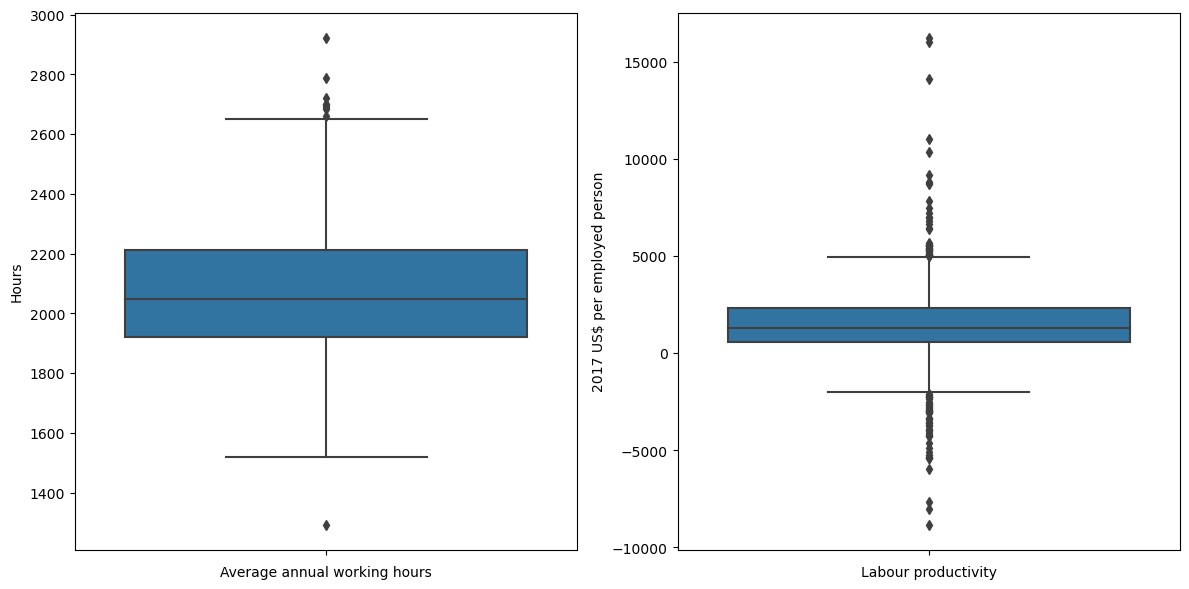

In [73]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the first subplot for 'col1'
plt.subplot(1, 2, 1)
sns.boxplot(y=merged_df['Average annual hours'])
# plt.title('Boxplot of col1')
plt.xlabel('Average annual working hours')
plt.ylabel('Hours')

# Create the second subplot for 'col2'
plt.subplot(1, 2, 2)
sns.boxplot(y=merged_df['Labour productivity'])
# plt.title('Boxplot of col2')
plt.xlabel('Labour productivity')
plt.ylabel('2017 US$ per employed person')

# Show the plot
plt.tight_layout()
plt.show()

## Openess

The first principal component from trade openness and financial openness.

In [45]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# merged_df[['Trade (% of GDP)', 'FDI Inward (% of GDP)']] = scaler.fit_transform(merged_df[['Trade (% of GDP)', 'FDI Inward (% of GDP)']])
# merged_df['Openness'] = 0.5 * merged_df['Trade (% of GDP)'] + 0.5 * merged_df['FDI Inward (% of GDP)']

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Standardise the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(merged_df[['Trade (% of GDP)', 'FDI Inward (% of GDP)']])

# Apply PCA
pca = PCA(n_components=1)  # We only need the first principal component
principal_component = pca.fit_transform(df_standardized)
print(f"Variance explained by the first principal component is\n{100 * pca.explained_variance_ratio_[0]:.2f}%")

# Create a composite index from the first principal component
scaler_min_max = MinMaxScaler()
merged_df['Openness'] = scaler_min_max.fit_transform(principal_component) * 100

Variance explained by the first principal component is
67.92%


In [46]:
merged_df

,ISO code,Country,Year,Real GDP,RGDP added value,Employment,Average annual hours,Labour productivity,Patent_Stock,Capital deepening,FinDev,Share of agriculture,Inflation,Government size,Trade (% of GDP),FDI Inward (% of GDP),Openness
0,AGO,Angola,2019,222151.062500,-3388.984375,16.644962,2161.12,-203.604208,-7.870968,78158.843241,14.02432,7.882625,19.187004,8.598856,57.829538,-4.93,4.857784
1,ALB,Albania,2011,30603.843750,759.664062,0.903198,1852.76,841.082863,5.870705,199761.820705,39.31433,18.226790,2.314744,10.974165,81.218569,6.80,7.956589
2,ALB,Albania,2014,31904.841797,556.277344,0.885706,1983.28,628.060597,14.990099,221682.355810,37.40271,19.990181,1.549917,11.451868,75.407846,8.40,7.956343
3,ALB,Albania,2015,32612.730469,707.888672,0.926395,2012.92,764.132411,26.741584,217275.903322,35.36265,19.780214,0.563991,11.110635,71.801006,8.31,7.771525
4,ALB,Albania,2016,33693.839844,1081.109375,0.988808,2059.20,1093.345735,42.730347,208677.748565,34.58179,19.849994,-0.632653,11.269315,74.809863,9.28,8.078275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,ZAF,South Africa,2018,731735.125000,5714.125000,18.686357,2228.72,305.791270,5127.816835,147806.842520,59.90397,2.260704,3.993295,19.352226,54.485545,1.35,5.771327
1430,ZAF,South Africa,2019,732851.625000,1116.500000,18.642710,2228.72,59.889362,4925.644310,150796.667459,60.34555,1.950321,4.613525,19.580080,53.897996,1.32,5.738606
1431,ZMB,Zambia,2017,53331.152344,1817.148438,5.009030,2078.96,362.774492,75.573494,50833.924829,11.14194,4.024271,10.072837,13.720795,71.585695,4.28,7.074340
1432,ZMB,Zambia,2018,55482.792969,2151.640625,5.032991,2051.40,427.507352,75.237470,53535.084280,11.63750,3.341124,7.411571,12.708663,74.888370,1.55,6.764089


In [47]:
merged_df['Openness'].describe()

count    1434.000000
mean        8.284385
std         5.271495
min         0.000000
25%         5.830517
50%         7.075897
75%         9.058947
max       100.000000
Name: Openness, dtype: float64

### Plot the Principal Components

In [51]:
pca_all = PCA()
pca_all.fit(df_standardized)

PCA()

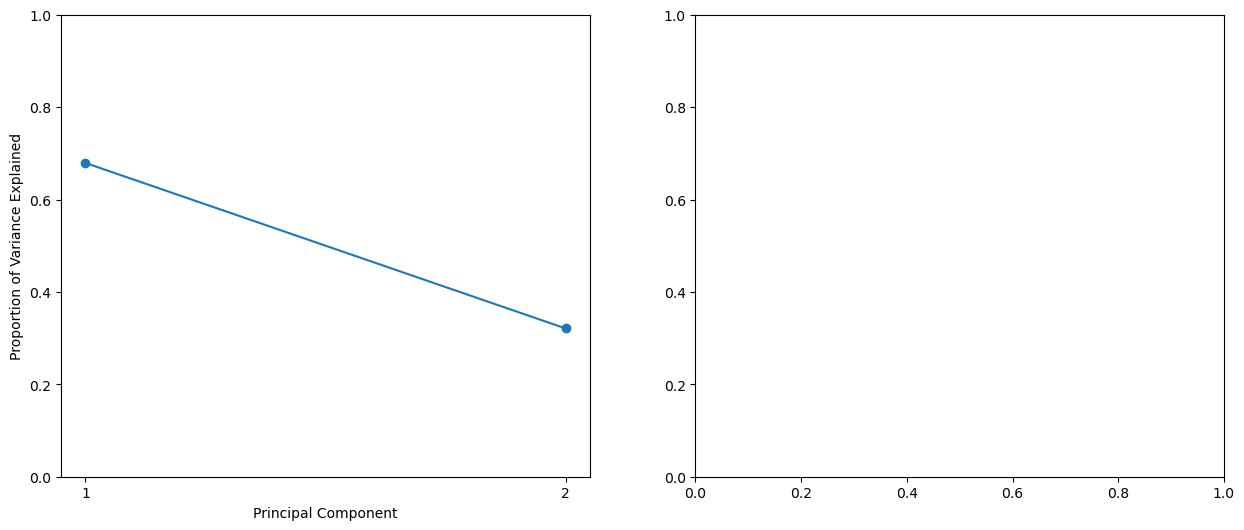

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca_all.n_components_)+1
ax = axes[0]
ax.plot(ticks, pca_all.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

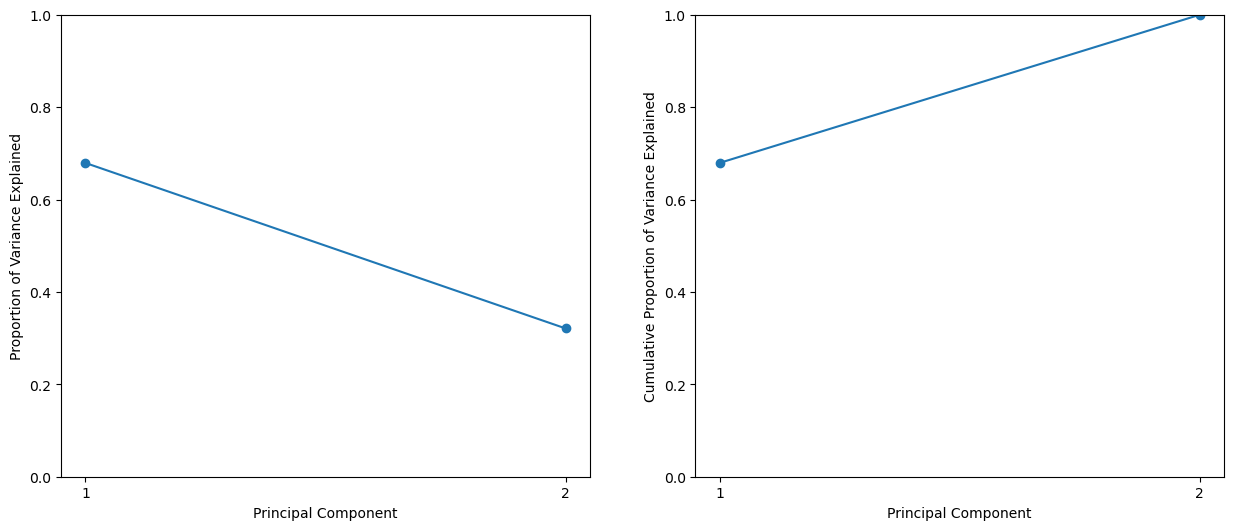

In [62]:
ax = axes[1]
ax.plot(ticks, pca_all.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [48]:
# Save the data
merged_df.to_csv('~/Desktop/2-硕士/MY498/Data/full_data.csv')